R
[[169.38888889  68.         156.55555556  60.61111111  64.61111111
  229.94444444]
 [ 68.          42.26666667  75.53333333  42.64444444  30.15555556
  111.31111111]
 [156.55555556  75.53333333 177.06666667  77.95555556  91.2
  252.51111111]
 [ 60.61111111  42.64444444  77.95555556  86.23333333  71.14444444
  120.34444444]
 [ 64.61111111  30.15555556  91.2         71.14444444  96.32222222
  119.58888889]
 [229.94444444 111.31111111 252.51111111 120.34444444 119.58888889
  464.01111111]]
Rxx
[[169.38888889  68.         156.55555556]
 [ 68.          42.26666667  75.53333333]
 [156.55555556  75.53333333 177.06666667]]
Ryy
[[ 86.23333333  71.14444444 120.34444444]
 [ 71.14444444  96.32222222 119.58888889]
 [120.34444444 119.58888889 464.01111111]]
Rxy
[[ 60.61111111  64.61111111 229.94444444]
 [ 42.64444444  30.15555556 111.31111111]
 [ 77.95555556  91.2        252.51111111]]
Ryx
[[ 60.61111111  42.64444444  77.95555556]
 [ 64.61111111  30.15555556  91.2       ]
 [229.94444444 111.311111

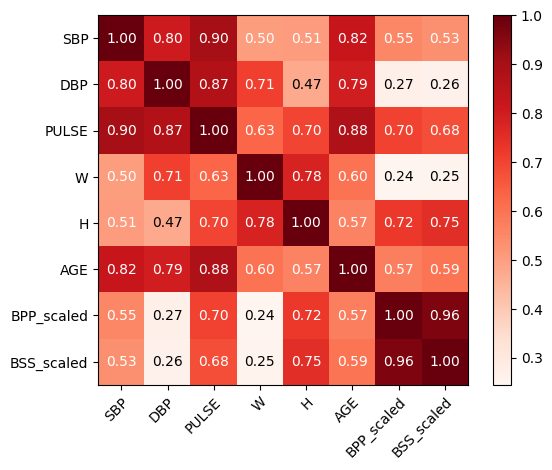

In [7]:
#canonical correlation:
import numpy as np
SBP=[120,109,130,121,135,140,150, 120,130,110]#x1
DBP=[76,80,82,78,85,87,95,80,93,78]#x2
PULSE=[80,90,95,86,110,107,120,90,100,80]#x3

W=[165,180,170,185,180,187, 190,186,191,169]#y1
H=[60,80,70,85,90,87,85,80,76,66]#y2
AGE=[25,30,43,19,64,75,80,60,55,32]#y3

All = np.array([SBP,DBP,PULSE,W,H,AGE])
R = np.cov(All)
print('R')
print(R)
Rxx = R[0:3,0:3]
Ryy = R[3:6,3:6]
Rxy=R[0:3,3:6]
Ryx=Rxy.T


print('Rxx')
print(Rxx)
print('Ryy')
print(Ryy)
print('Rxy')
print(Rxy)
print('Ryx')
print(Ryx)




# Rx matrix for the for the blood pressure 
Rxx_inv=(np.linalg.inv(Rxx))
Ryy_inv=np.linalg.inv(Ryy)
A=np.matmul(Rxx_inv,Rxy)
B=np.matmul(Ryy_inv,Ryx)
Rx=np.matmul(A,B)
print('Rx')
print(Rx)
# eigen values and vectors for the blood pressure 

from numpy.linalg import eig
w,v=eig(Rx)
print('E-value:', w)
print('E-vector', v)
#BP equation:
BPP = np.zeros((len(SBP)))
for i in range(len(SBP)):
    BPP[i] =   v[0][1]*SBP[i]+v[1][1]*DBP[i] + v[2][1]*PULSE[i]
print('BPP Equation')
print(v[0][1],v[1][1],v[2][1])
print('BPP values')
print(BPP)
#body shape
# Rx matrix for the for the body shape
A=np.matmul(Ryy_inv,Ryx)
B=np.matmul(Rxx_inv,Rxy)
rx=np.matmul(A,B)
# eigen values and vectors for the body shape
print('Rx')
print(rx)
w,v=eig(rx)
print('E-value:', w)
print('E-vector', v)
#BP equation:
BSS = np.zeros((len(W)))
for i in range(len(W)):
    BSS[i] =   v[0][2]*W[i]+v[1][2]*H[i]+v[2][2]*AGE[i]

print('BSS equation')
print(v[0][2],v[1][2],v[2][2])

print('BSS values')
print(BSS)
#standardized scores
# canonical loadings and cross loadings 



import scipy.stats
scipy.stats.pearsonr(BPP,BSS)
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of BPP
BPP_scaled = scale.fit_transform(BPP.reshape(-1, 1)) 
print('BPP_scaled')
print(BPP_scaled)

# standardization of BSS
BSS_scaled = scale.fit_transform(BSS.reshape(-1, 1))
print('BSS_scaled') 
print(BSS_scaled)

print('pearosn')
print('bpp_scale,spp')
print(scipy.stats.pearsonr(BPP_scaled.squeeze(), SBP))



#plot the heat map 
import numpy as np
from mlxtend.plotting import heatmap
import matplotlib.pyplot as plt
data=np.zeros((len(SBP),8)) 
data[:,0]=SBP;
data[:,1]=DBP; 
data[:,2]=PULSE;
data[:,3]=W; 
data[:,4]=H ; 
data[:,5]=AGE ; 
data[:,6]=BPP_scaled.squeeze(); 
data[:,7]=BSS_scaled.squeeze()
cols=['SBP','DBP','PULSE', 'W','H','AGE','BPP_scaled','BSS_scaled']
cm = np.corrcoef(data.T)

hm = heatmap(cm, row_names=cols, column_names=cols,cmap='Reds')

# plt.savefig('images/10_04.png', dpi=300)
plt.show()

R
[[169.38888889  68.         156.55555556  60.61111111  64.61111111]
 [ 68.          42.26666667  75.53333333  42.64444444  30.15555556]
 [156.55555556  75.53333333 177.06666667  77.95555556  91.2       ]
 [ 60.61111111  42.64444444  77.95555556  86.23333333  71.14444444]
 [ 64.61111111  30.15555556  91.2         71.14444444  96.32222222]]
Rxx
[[169.38888889  68.         156.55555556]
 [ 68.          42.26666667  75.53333333]
 [156.55555556  75.53333333 177.06666667]]
Ryy
[[86.23333333 71.14444444]
 [71.14444444 96.32222222]]
Rxy
[[60.61111111 64.61111111]
 [42.64444444 30.15555556]
 [77.95555556 91.2       ]]
Ryx
[[60.61111111 42.64444444 77.95555556]
 [64.61111111 30.15555556 91.2       ]]
Rx
[[-0.30580519 -0.12057226 -0.44337678]
 [ 0.05662245  0.69624454 -0.2746031 ]
 [ 0.61461314  0.00703419  1.0156458 ]]
E-value: [0.         0.87442538 0.53165977]
E-vector [[-0.82608739 -0.11091675  0.34696452]
 [ 0.26362657 -0.84398942 -0.83427614]
 [ 0.49807696  0.52476598 -0.42848447]]
BPP Eq

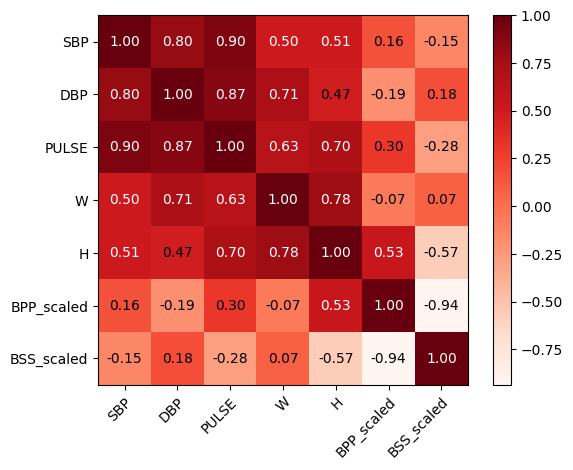

In [8]:
#canonical correlation:
import numpy as np
SBP=[120,109,130,121,135,140,150, 120,130,110]#x1
DBP=[76,80,82,78,85,87,95,80,93,78]#x2
PULSE=[80,90,95,86,110,107,120,90,100,80]#x3

W=[165,180,170,185,180,187, 190,186,191,169]#y1
H=[60,80,70,85,90,87,85,80,76,66]#y2
#AGE=[25,30,43,19,64,75,80,60,55,32]#y3

All = np.array([SBP,DBP,PULSE,W,H])
R = np.cov(All)
print('R')
print(R)
Rxx = R[0:3,0:3]
Ryy = R[3:5,3:5]
Rxy=R[0:3,3:5]
Ryx=Rxy.T


print('Rxx')
print(Rxx)
print('Ryy')
print(Ryy)
print('Rxy')
print(Rxy)
print('Ryx')
print(Ryx)




# Rx matrix for the for the blood pressure 
Rxx_inv=(np.linalg.inv(Rxx))
Ryy_inv=np.linalg.inv(Ryy)
A=np.matmul(Rxx_inv,Rxy)
B=np.matmul(Ryy_inv,Ryx)
Rx=np.matmul(A,B)
print('Rx')
print(Rx)
# eigen values and vectors for the blood pressure 

from numpy.linalg import eig
w,v=eig(Rx)
print('E-value:', w)
print('E-vector', v)
#BP equation:
BPP = np.zeros((len(SBP)))
for i in range(len(SBP)):
    BPP[i] =   v[0][1]*SBP[i]+v[1][1]*DBP[i] + v[2][1]*PULSE[i]
print('BPP Equation')
print(v[0][1],v[1][1],v[2][1])
print('BPP values')
print(BPP)
#body shape
# Rx matrix for the for the body shape
A=np.matmul(Ryy_inv,Ryx)
B=np.matmul(Rxx_inv,Rxy)
rx=np.matmul(A,B)
# eigen values and vectors for the body shape
print('Rx')
print(rx)
w,v=eig(rx)
print('E-value:', w)
print('E-vector', v)
#BP equation:
BSS = np.zeros((len(W)))
for i in range(len(W)):
    BSS[i] =   v[0][1]*W[i]+v[1][1]*H[i]

print('BSS equation')
print(v[0][1],v[1][1])

print('BSS values')
print(BSS)
#standardized scores
# canonical loadings and cross loadings 



import scipy.stats
scipy.stats.pearsonr(BPP,BSS)
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of BPP
BPP_scaled = scale.fit_transform(BPP.reshape(-1, 1)) 
print('BPP_scaled')
print(BPP_scaled)

# standardization of BSS
BSS_scaled = scale.fit_transform(BSS.reshape(-1, 1))
print('BSS_scaled') 
print(BSS_scaled)

print('pearosn')
print('bpp_scale,spp')
print(scipy.stats.pearsonr(BPP_scaled.squeeze(), SBP))



#plot the heat map 
import numpy as np
from mlxtend.plotting import heatmap
import matplotlib.pyplot as plt
data=np.zeros((len(SBP),7)) 
data[:,0]=SBP;
data[:,1]=DBP; 
data[:,2]=PULSE;
data[:,3]=W; 
data[:,4]=H ; 
#data[:,5]=AGE ; 
data[:,5]=BPP_scaled.squeeze(); 
data[:,6]=BSS_scaled.squeeze()
cols=['SBP','DBP','PULSE', 'W','H','BPP_scaled','BSS_scaled']
cm = np.corrcoef(data.T)
hm = heatmap(cm, row_names=cols, column_names=cols,cmap='Reds')

# plt.savefig('images/10_04.png', dpi=300)
plt.show()

R
[[169.38888889  68.          60.61111111  64.61111111 229.94444444]
 [ 68.          42.26666667  42.64444444  30.15555556 111.31111111]
 [ 60.61111111  42.64444444  86.23333333  71.14444444 120.34444444]
 [ 64.61111111  30.15555556  71.14444444  96.32222222 119.58888889]
 [229.94444444 111.31111111 120.34444444 119.58888889 464.01111111]]
Rxx
[[169.38888889  68.        ]
 [ 68.          42.26666667]]
Ryy
[[ 86.23333333  71.14444444 120.34444444]
 [ 71.14444444  96.32222222 119.58888889]
 [120.34444444 119.58888889 464.01111111]]
Rxy
[[ 60.61111111  64.61111111 229.94444444]
 [ 42.64444444  30.15555556 111.31111111]]
Ryx
[[ 60.61111111  42.64444444]
 [ 64.61111111  30.15555556]
 [229.94444444 111.31111111]]
Rx
[[0.45327592 0.04218875]
 [0.55561446 0.69353571]]
E-value: [0.37879885 0.76801278]
E-vector [[-0.4928806  -0.13285625]
 [ 0.87009696 -0.99113532]]
BPP Equation
-0.49288059527208294 0.870096959427073
BPP values
[ 6.98169748 15.88377187  7.27347329  8.22901081  7.41936119  6.6951

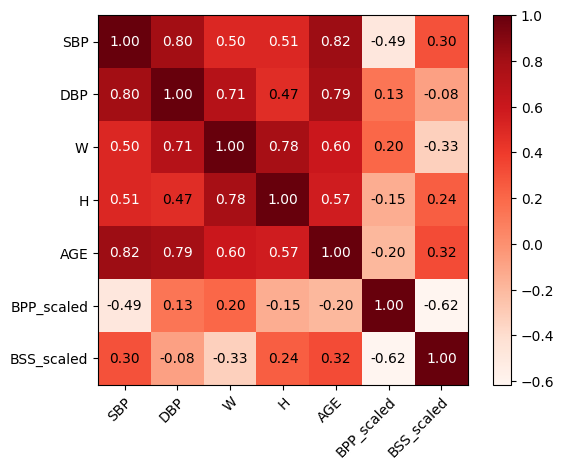

In [9]:
#canonical correlation:
import numpy as np
SBP=[120,109,130,121,135,140,150, 120,130,110]#x1
DBP=[76,80,82,78,85,87,95,80,93,78]#x2
#PULSE=[80,90,95,86,110,107,120,90,100,80]#x3

W=[165,180,170,185,180,187, 190,186,191,169]#y1
H=[60,80,70,85,90,87,85,80,76,66]#y2
AGE=[25,30,43,19,64,75,80,60,55,32]#y3

All = np.array([SBP,DBP,W,H,AGE])
R = np.cov(All)
print('R')
print(R)
Rxx = R[0:2,0:2]
Ryy = R[2:5,2:5]
Rxy=R[0:2,2:5]
Ryx=Rxy.T


print('Rxx')
print(Rxx)
print('Ryy')
print(Ryy)
print('Rxy')
print(Rxy)
print('Ryx')
print(Ryx)




# Rx matrix for the for the blood pressure 
Rxx_inv=(np.linalg.inv(Rxx))
Ryy_inv=np.linalg.inv(Ryy)
A=np.matmul(Rxx_inv,Rxy)
B=np.matmul(Ryy_inv,Ryx)
Rx=np.matmul(A,B)
print('Rx')
print(Rx)
# eigen values and vectors for the blood pressure 

from numpy.linalg import eig
w,v=eig(Rx)
print('E-value:', w)
print('E-vector', v)
#BP equation:
BPP = np.zeros((len(SBP)))
for i in range(len(SBP)):
    BPP[i] =   v[0][0]*SBP[i]+v[1][0]*DBP[i] #+ v[2][1]*PULSE[i]
print('BPP Equation')
print(v[0][0],v[1][0])
print('BPP values')
print(BPP)
#body shape
# Rx matrix for the for the body shape
A=np.matmul(Ryy_inv,Ryx)
B=np.matmul(Rxx_inv,Rxy)
rx=np.matmul(A,B)
# eigen values and vectors for the body shape
print('Rx')
print(rx)
w,v=eig(rx)
print('E-value:', w)
print('E-vector', v)
#BP equation:
BSS = np.zeros((len(W)))
for i in range(len(W)):
    BSS[i] =   v[0][2]*W[i]+v[1][2]*H[i]+v[2][2]*AGE[i]

print('BSS equation')
print(v[0][2],v[1][2],v[2][2])

print('BSS values')
print(BSS)
#standardized scores
# canonical loadings and cross loadings 



import scipy.stats
scipy.stats.pearsonr(BPP,BSS)
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of BPP
BPP_scaled = scale.fit_transform(BPP.reshape(-1, 1)) 
print('BPP_scaled')
print(BPP_scaled)

# standardization of BSS
BSS_scaled = scale.fit_transform(BSS.reshape(-1, 1))
print('BSS_scaled') 
print(BSS_scaled)

print('pearosn')
print('bpp_scale,spp')
print(scipy.stats.pearsonr(BPP_scaled.squeeze(), SBP))



#plot the heat map 
import numpy as np
from mlxtend.plotting import heatmap
import matplotlib.pyplot as plt
data=np.zeros((len(SBP),7)) 
data[:,0]=SBP;
data[:,1]=DBP; 

data[:,2]=W; 
data[:,3]=H ; 
data[:,4]=AGE ; 
data[:,5]=BPP_scaled.squeeze(); 
data[:,6]=BSS_scaled.squeeze()
cols=['SBP','DBP','W','H','AGE','BPP_scaled','BSS_scaled']
cm = np.corrcoef(data.T)
hm = heatmap(cm, row_names=cols, column_names=cols,cmap='Reds')

# plt.savefig('images/10_04.png', dpi=300)
plt.show()